# Macaco Showcase
Esse notebook é um showcase do dataframe Macaco. Seu objetivo é mostrar o uso de suas funcionalidades.
Note que para utilizar esse Notebook é necessário ter as biblioteca Pandas, Seaborn e Numpy. As bibliotecas
Matplotlib e Tabulate são instaladas automaticamente ao instalar a biblioteca Macaco. Caso não queira instalar
essas bibliotecas extras não tem problema, este documento é auto-explicativo.

Nesse showcase usaremos o conhecido DataBase Iris.

In [2]:
import Macaco as mc
import pandas as pd
import seaborn as sns
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt


iris = sns.load_dataset('iris')

## Criando o DataFrame
Abaixo mostramos como criar o dataframe. Note que como dado de entrada, a classe DataFrameMc recebe
um dicionário com os valores em listas

* Exemplo de dado de entrada: *{'coluna1':[0,1,30],'coluna2':['string1','string2','string3']}*

O método *.Show()* recebe a mesma estrutura e printa os dados de forma tabular, sendo mais fácil analisar
o que está dentro do DataFrame. O método *.GetDados()* retorna um dicionário no mesmo formato que foi fornecido
no input do dataframe.

In [53]:
data = iris.to_dict('list')
df = mc.DataFrameMc(data)
df.Show(df.GetDados())

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ----------
           5.1            3.5             1.4            0.2  setosa
           4.9            3               1.4            0.2  setosa
           4.7            3.2             1.3            0.2  setosa
           4.6            3.1             1.5            0.2  setosa
           5              3.6             1.4            0.2  setosa
           5.4            3.9             1.7            0.4  setosa
           4.6            3.4             1.4            0.3  setosa
           5              3.4             1.5            0.2  setosa
           4.4            2.9             1.4            0.2  setosa
           4.9            3.1             1.5            0.1  setosa
           5.4            3.7             1.5            0.2  setosa
           4.8            3.4             1.6            0.2  setosa
           4.8            3  

## Atributos para Gerenciar o DataFrame 
A classe DataFrameMc() contém alguns atributos que são utilizados para gerenciar os dados e permitir que
o código de python do usuário se comunique com a biblioteca em C++ de maneira mais fácil (sem precisar
explicitamente informar o tipo do dado e coisas do gênero).

In [55]:
df.colunas # Lista de colunas com o determinado tipo

{'sepal_length': 'double',
 'sepal_width': 'double',
 'petal_length': 'double',
 'petal_width': 'double',
 'species': 'string'}

Perceba que tipo de colunas é inferido através dos dados fornecidos pelo usuário. Quando temos somente inteiros,
a coluna é do tipo 'int'. Quando temos floats e inteiros ou somente floats, a coluna é do tipo 'double'. Quando
temos strings ou tipos misturados, os dados são todos convertidos para strings e a coluna é do tipo 'string'.

Lembre que os únicos tipos de dados permitidos são **string**, **int** e **double**.

In [60]:
df.shape # Quantidade de linhas, Quantidade de Colunas

[150, 5]

In [62]:
df.indices # Colunas indexadas. Até o momento não indexamos nada.

[]

## Slicing e Seleção de Coluna

Abaixo mostramos como selecionar colunas, linhas e fazer slices de forma geral.

In [46]:
print('Selecionando a coluna species')
print('')
print(df.GetColuna('species'))

print('-----------------------------------------------------------')
print('Selecionando linhas 0 a 40')
print('')
print(df.GetLinha(list(range(0,40))))

print('-----------------------------------------------------------')
print('Selecionando das linhas 10 a 50 da coluna sepal_length')
print(df.GetLoc(list(range(10,50)),'sepal_length'))


Selecionando a coluna species

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 

## Realizando Queries

O método ".Query()" retorna as linhas contendo a informação buscada. Com essas linhas em mãos, basta
chamar uma função de slicing para obter os com os filtros desejados.

In [107]:
col = 'petal_width'
valor = 2.5

# Queries possíveis. Note que abaixo só mostramos o resultado da última query
df.GetLinha(df.Query(col,'<',valor))
df.GetLinha(df.Query(col,'<=',valor))
df.GetLinha(df.Query(col,'>',valor))
df.GetLinha(df.Query(col,'>=',valor))
df.GetLinha(df.Query(col,'==',valor))

{'sepal_length': [6.3, 7.2, 6.7],
 'sepal_width': [3.3, 3.6, 3.3],
 'petal_length': [6.0, 6.1, 5.7],
 'petal_width': [2.5, 2.5, 2.5],
 'species': ['virginica', 'virginica', 'virginica']}

Uma maneira de agilizar essa queries é através da indexação das colunas. Chamando a função de *IndexarColuna()*
o dataframe cria uma estrutura de árvore binária em C++ que armazena os dados da coluna. Essa árvore é atualizada
automaticamente caso seja inserido um novo dado ou a coluna seja deletada. Uma vez indexada a coluna,
a *.Query()* identifica que a coluna sendo buscada é um índice e assim chama a função adequada em C++ para fazer
a busca utilizando a árvore binária.

Uma maneira especial de realizar queries que é útil em caso de coordenadas é a filtrar os dados presentes
em uma região. Para isso, temos a função *QueryRect()* que recebe as dimensões de um retângulo e realiza
a query utilizando C++ para agilizar o processo. Note que essa função exige que os dados sejam indexados
e que a coluna seja do tipo double.

In [108]:
df.IndexarColuna('species')
df.IndexarColuna('sepal_length')
df.IndexarColuna('sepal_width')
df.GetLinha(df.Query('species','==','setosa'))

rect = [6.0,2.5,7,3] # xmin, ymin, xman, ymax
df.GetLinha(df.QueryRect(rect, 'sepal_length', 'sepal_width'))

{'sepal_length': [6.5,
  6.6,
  6.1,
  6.1,
  6.3,
  6.1,
  6.4,
  6.6,
  6.8,
  6.7,
  6.0,
  6.0,
  6.1,
  6.2,
  6.3,
  6.5,
  6.7,
  6.4,
  6.8,
  6.5,
  6.3,
  6.2,
  6.1,
  6.4,
  6.4,
  6.3,
  6.1,
  6.0,
  6.7,
  6.3,
  6.5],
 'sepal_width': [2.8,
  2.9,
  2.9,
  2.8,
  2.5,
  2.8,
  2.9,
  3.0,
  2.8,
  3.0,
  2.9,
  2.7,
  3.0,
  2.9,
  2.9,
  3.0,
  2.5,
  2.7,
  3.0,
  3.0,
  2.7,
  2.8,
  3.0,
  2.8,
  2.8,
  2.8,
  2.6,
  3.0,
  3.0,
  2.5,
  3.0],
 'petal_length': [4.6,
  4.6,
  4.7,
  4.0,
  4.9,
  4.7,
  4.3,
  4.4,
  4.8,
  5.0,
  4.5,
  5.1,
  4.6,
  4.3,
  5.6,
  5.8,
  5.8,
  5.3,
  5.5,
  5.5,
  4.9,
  4.8,
  4.9,
  5.6,
  5.6,
  5.1,
  5.6,
  4.8,
  5.2,
  5.0,
  5.2],
 'petal_width': [1.5,
  1.3,
  1.4,
  1.3,
  1.5,
  1.2,
  1.3,
  1.4,
  1.4,
  1.7,
  1.5,
  1.6,
  1.4,
  1.3,
  1.8,
  2.2,
  1.8,
  1.9,
  2.1,
  1.8,
  1.8,
  1.8,
  1.8,
  2.1,
  2.2,
  1.5,
  1.4,
  1.8,
  2.3,
  1.9,
  2.0],
 'species': ['versicolor',
  'versicolor',
  'versicolor',
  'vers

## Inserindo e removendo dados do Dataframe
Vamos mostrar como inserir e remover linhas, colunas e índices. Note que a remoção do índice é na verdade
uma "desindexação", de forma que a árvore binária é desfeita e o dataframe volta a funcionar como se a coluna
nunca tivesse sido indexada.

In [109]:
df.InserirColuna([1] * df.shape[0],'coluna_teste')
df.Show(df.GetLinha([0]))

  sepal_length    sepal_width    petal_length    petal_width  species      coluna_teste
--------------  -------------  --------------  -------------  ---------  --------------
           5.1            3.5             1.4            0.2  setosa                  1


In [110]:
df.RemoverColuna('coluna_teste')
df.Show(df.GetLinha([0]))

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ---------
           5.1            3.5             1.4            0.2  setosa


Veja que o formato de inserção de linha exige que se crie um dicionário, da mesma forma que foi feito
quando que se criou o Dataframe. Além disso, todo dado de entrada deve ser uma lista, como fica claro abaixo.

In [111]:
linha_nova = {'sepal_length':[100],'sepal_width':[200], 'petal_length':[-2],
              'petal_width':[-10], 'species':['teste']}
df.InserirLinha(linha_nova)
df.Show(df.GetLinha([df.shape[0]-1]))

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ---------
           100            200              -2            -10  teste


In [112]:
df.shape

[151, 8]

In [113]:
df.RemoverLinha([df.shape[0]-1])
df.Show(df.GetLinha([df.shape[0]-1]))

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ---------
           5.9              3             5.1            1.8  virginica


Por fim, vamos remover um indice. 

In [114]:
print(df.indices)
df.RemoverIndice('species')
print(df.indices)

['sepal_length', 'sepal_width']

## Plotando os dados

Por fim, vamos mostrar como utilizar as funções de plotagem. Os plots são construídos utilizando a biblioteca
Matplotlib do Python, e assim aceitam os mesmos argumentos comumente aceitos pelo módulo *pyplot*, além de também
poderem serem manipuladas da mesma forma para inserir legendas, alterar tamanhos da imagem, etc.

* Scatter Plot e Line Plots 

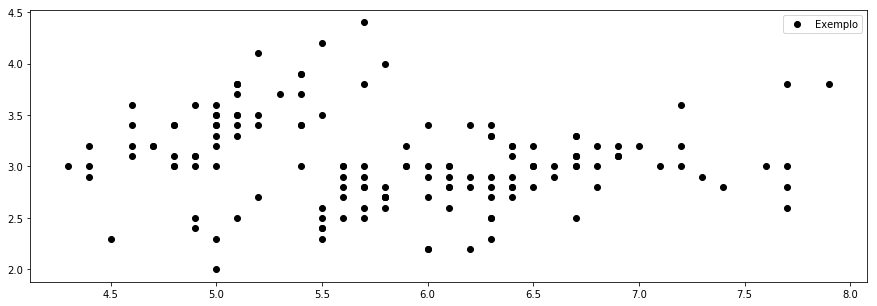

In [128]:
plt.figure(figsize=(15,5))

# df.Plot('sepal_length','sepal_width','-') # Essa linha de código plota uma linha invés do marker
df.Plot('sepal_length','sepal_width','o',color='k',label='Exemplo')
plt.legend()

Abaixo utilizamos a função de *QueryRect()* para plotar somente parcelas dos dados.

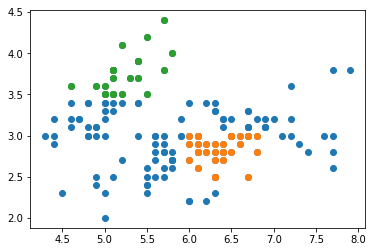

In [119]:
rect1 = [6.0,2.5,7,3]
rect2 = [4,3.5,6,5]
filtro1 = df.GetLinha(df.QueryRect(rect1, 'sepal_length', 'sepal_width'))
filtro2 = df.GetLinha(df.QueryRect(rect2, 'sepal_length', 'sepal_width'))

df.Plot('sepal_length','sepal_width','o')
plt.plot(filtro1['sepal_length'],filtro1['sepal_width'],'o')
plt.plot(filtro2['sepal_length'],filtro2['sepal_width'],'o')

* Histogramas 1D e 2D

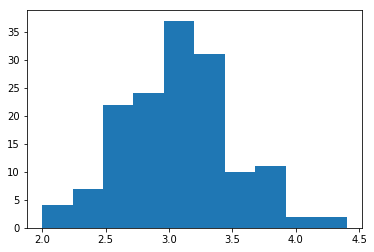

In [120]:
df.Hist('sepal_width')

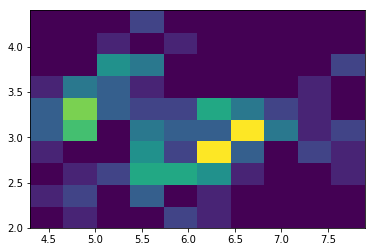

In [121]:
df.Hist2D('sepal_length','sepal_width')

* Gráficos de Barra - Permitem os tipos "soma", "contador" e "média"

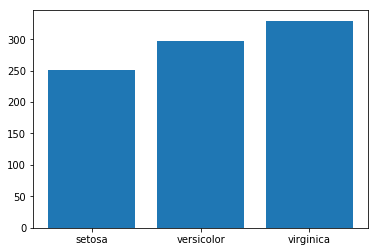

In [122]:
df.BarPlot('sepal_length','species',tipo='soma')

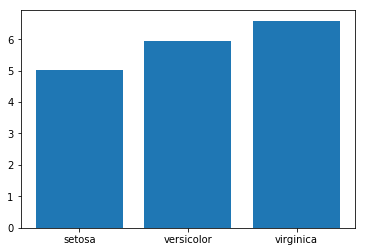

In [123]:
df.BarPlot('sepal_length','species',tipo='media')

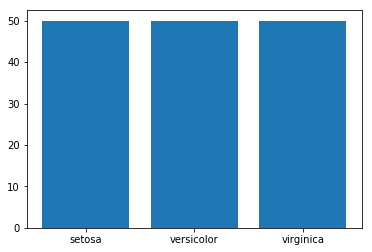

In [124]:
df.BarPlot('sepal_length','species',tipo='contador')

# Fim. 